Load the `tidyverse`. 📊

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Run the following cell to get the CDC vaccination data. 

In [2]:
 vax_data = read_csv(
     "covid19_vaccinations_in_the_united_states.csv", 
     na = 'N/A',
     col_types = cols()
 )

What columns are in the data set? 


(**Hint:** for wide tables like this it can be useful to just print the column names using the `colnames` function—can you figure out how to use `colnames` from its documentation?)

In [3]:
#vax_data %>% head
#not as good because column names are cut off because they are too long

In [4]:
#colnames(vax_data)
#this is how to use colnames, but there was too much print out so I commented it out

#vax_data %>% colnames()
#can also do this and it will perform the same function

Make a histogram (with a rug) of 18+ at-least-one-dose vaccination rates (percent) for all states. **When you're working with a column name that has spaces, you need to wrap it in back ticks \`\`.**

Like this:

```R
aes(x = `some column name with spaces`)
```

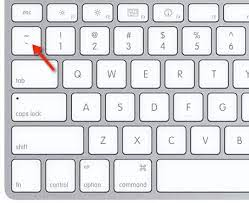

In [5]:
#p = ggplot(vax_data, aes(x = `People 18+ with at least One Dose by State of Residence`))
#must use back tick (on tilde key) if column name has spaces in it
#p = p + geom_histogram()
#p

#This code creates a chart but not the one the exercise was looking for
    #look below for correct chart

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


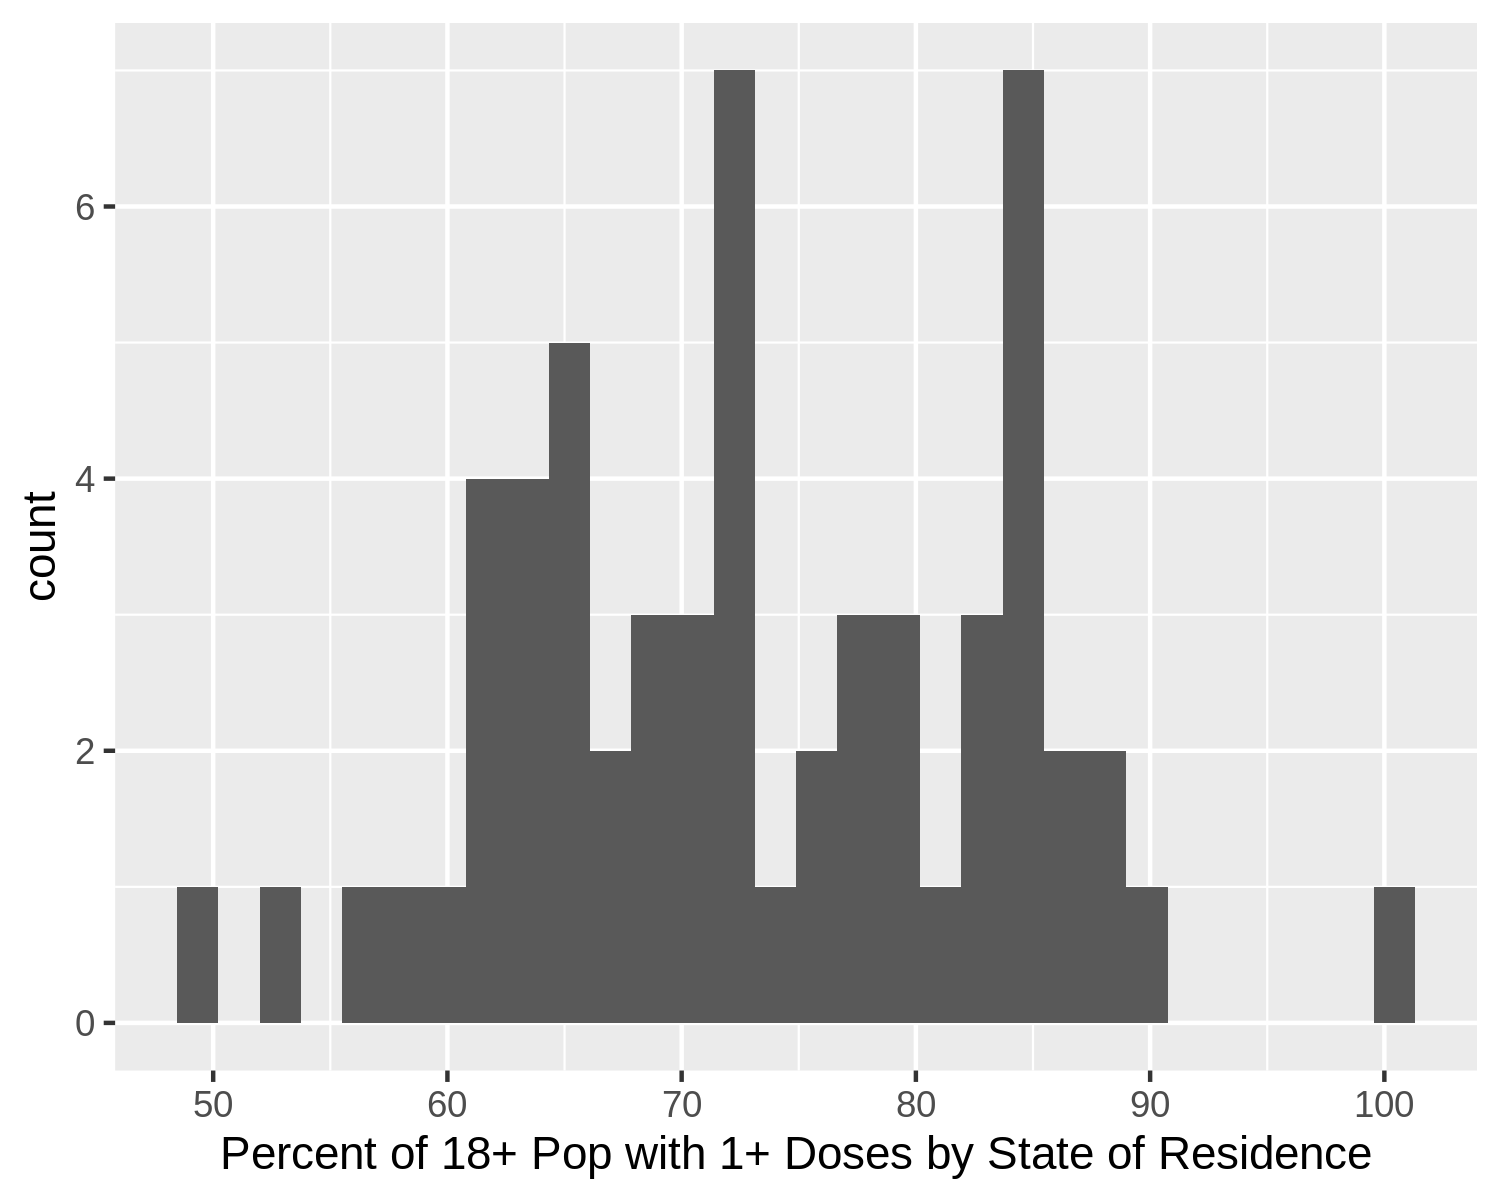

In [6]:
p = ggplot(vax_data, aes(x = `Percent of 18+ Pop with 1+ Doses by State of Residence`))
#must use back tick (on tilde key) if column name has spaces in it
p = p + geom_histogram() 
p

The code below will pull out the vaccination rate for North Carolina.

In [7]:
 vax_data %>%
     filter(`State/Territory/Federal Entity` == "North Carolina") %>%
     pull(`Percent of 18+ Pop with at least One Dose by State of Residence`) %>%
     paste("of 18 or older North Carolinians have at least 1 dose")

[1] "69.4 of 18 or older North Carolinians have at least 1 dose"

Can you use `geom_vline` to add a vertical line representing the position of NC's vaccination rate to your histogram? What arguments does `geom_vline` take?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


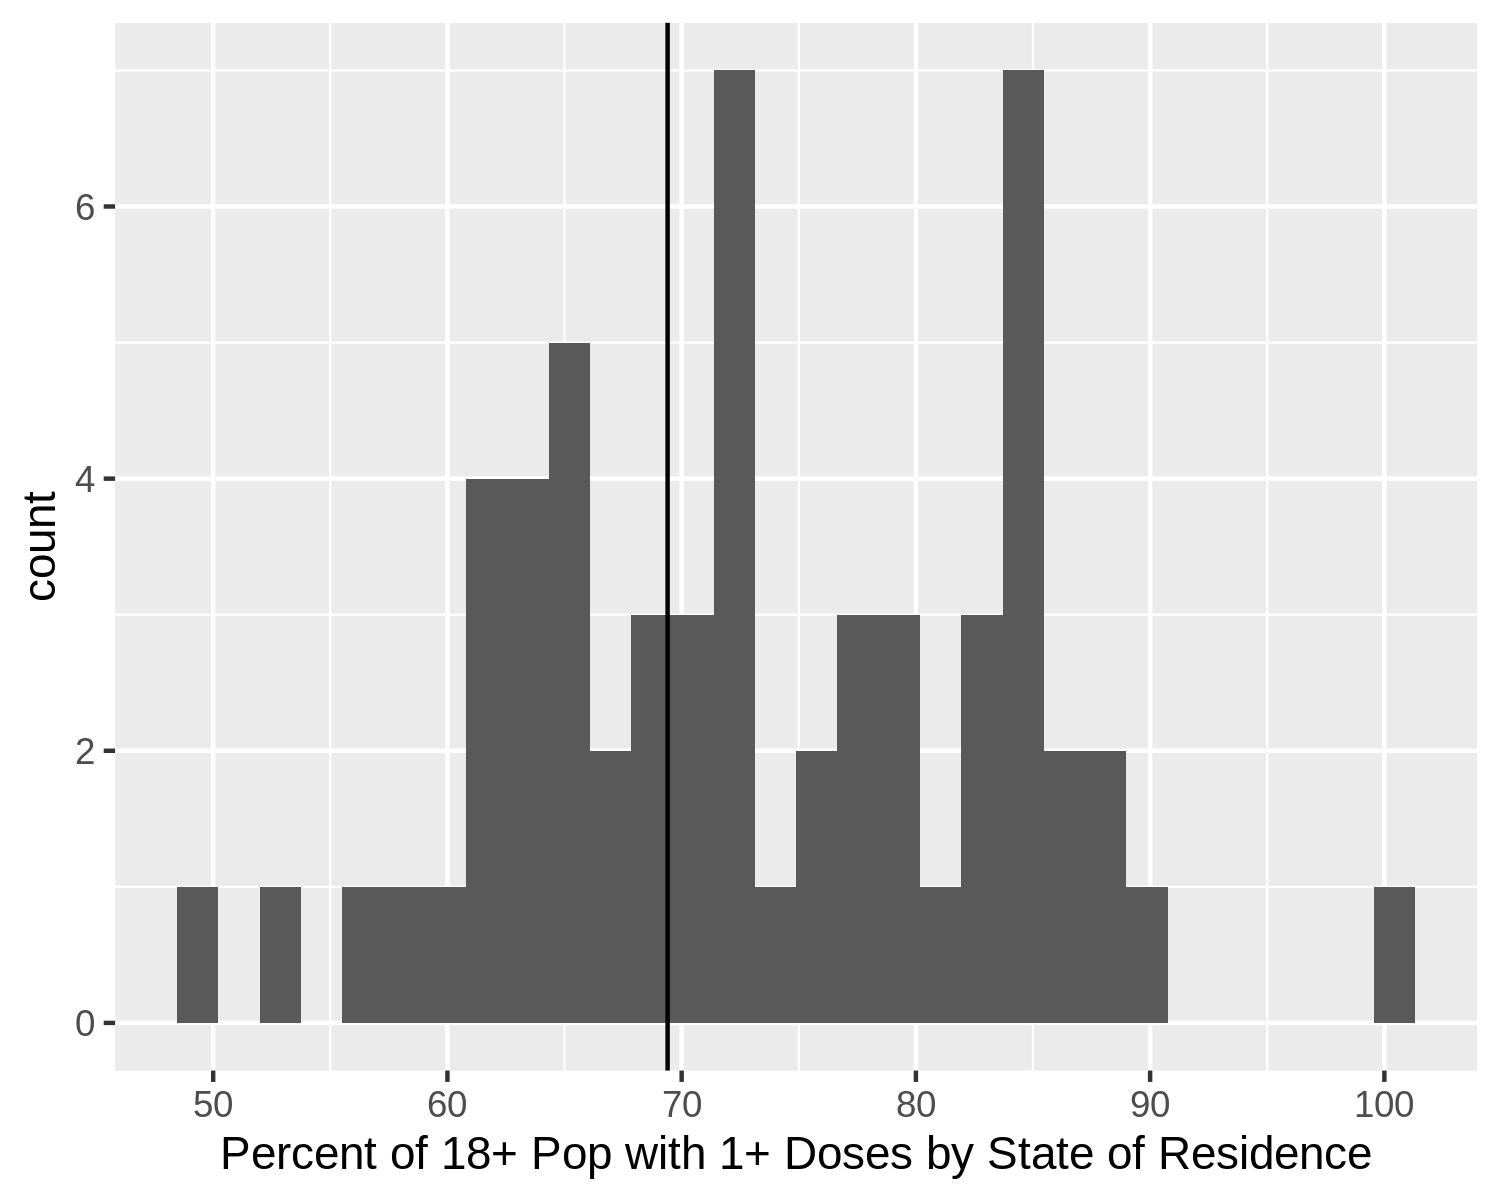

In [8]:
p + geom_vline(xintercept = 69.4)
#this shows where NC lies on the chart in terms of vaccination status

In [18]:
#vax_data %>%
    #rename(perc_18plus_one_dose = `Percent of 18+ Pop with 1+ Doses by State of Residence`, 
          #perc_18plus_two_dose = `Percent of 18+ Pop with 2 Doses by State of Residence` )#%>% 
#colnames

#needs to follow this formatting to work
#above shows that the colnames have indeed been renamed

vax_data_long = vax_data %>%
    rename(perc_18plus_one_dose = `Percent of 18+ Pop with 1+ Doses by State of Residence`, 
          perc_18plus_two_dose = `Percent of 18+ Pop with 2 Doses by State of Residence` )%>% 

    select(perc_18plus_one_dose, perc_18plus_two_dose, `State/Territory/Federal Entity`) %>%
    pivot_longer(cols = c("perc_18plus_one_dose", "perc_18plus_two_dose"), 
             values_to = 'percent', 
             names_to = 'dose_number') %>%
#this pivots these columns into long form where they are now variables instead of column headers
#values_to and names_to are functions that allow the variable names to be changed
    mutate(nc = ifelse(`State/Territory/Federal Entity` == 'North Carolina', 'yes', 'no'))



In [10]:
vax_data_long %>% head
#be sure column is added

State/Territory/Federal Entity,dose_number,percent,nc
<chr>,<chr>,<dbl>,<chr>
Alaska,perc_18plus_one_dose,68.9,no
Alaska,perc_18plus_two_dose,54.6,no
Alabama,perc_18plus_one_dose,62.7,no
Alabama,perc_18plus_two_dose,46.2,no
Arkansas,perc_18plus_one_dose,66.4,no
Arkansas,perc_18plus_two_dose,49.7,no


In [11]:
#scratch work to build column, we copied this into cell above

#vax_data_long %>% 
    #mutate(nc = ifelse(`State/Territory/Federal Entity` == 'North Carolina', 'yes', 'no')) %>%
    #head
    #allows us to add column to data

Warning message:
“Removed 4 rows containing missing values (geom_point).”


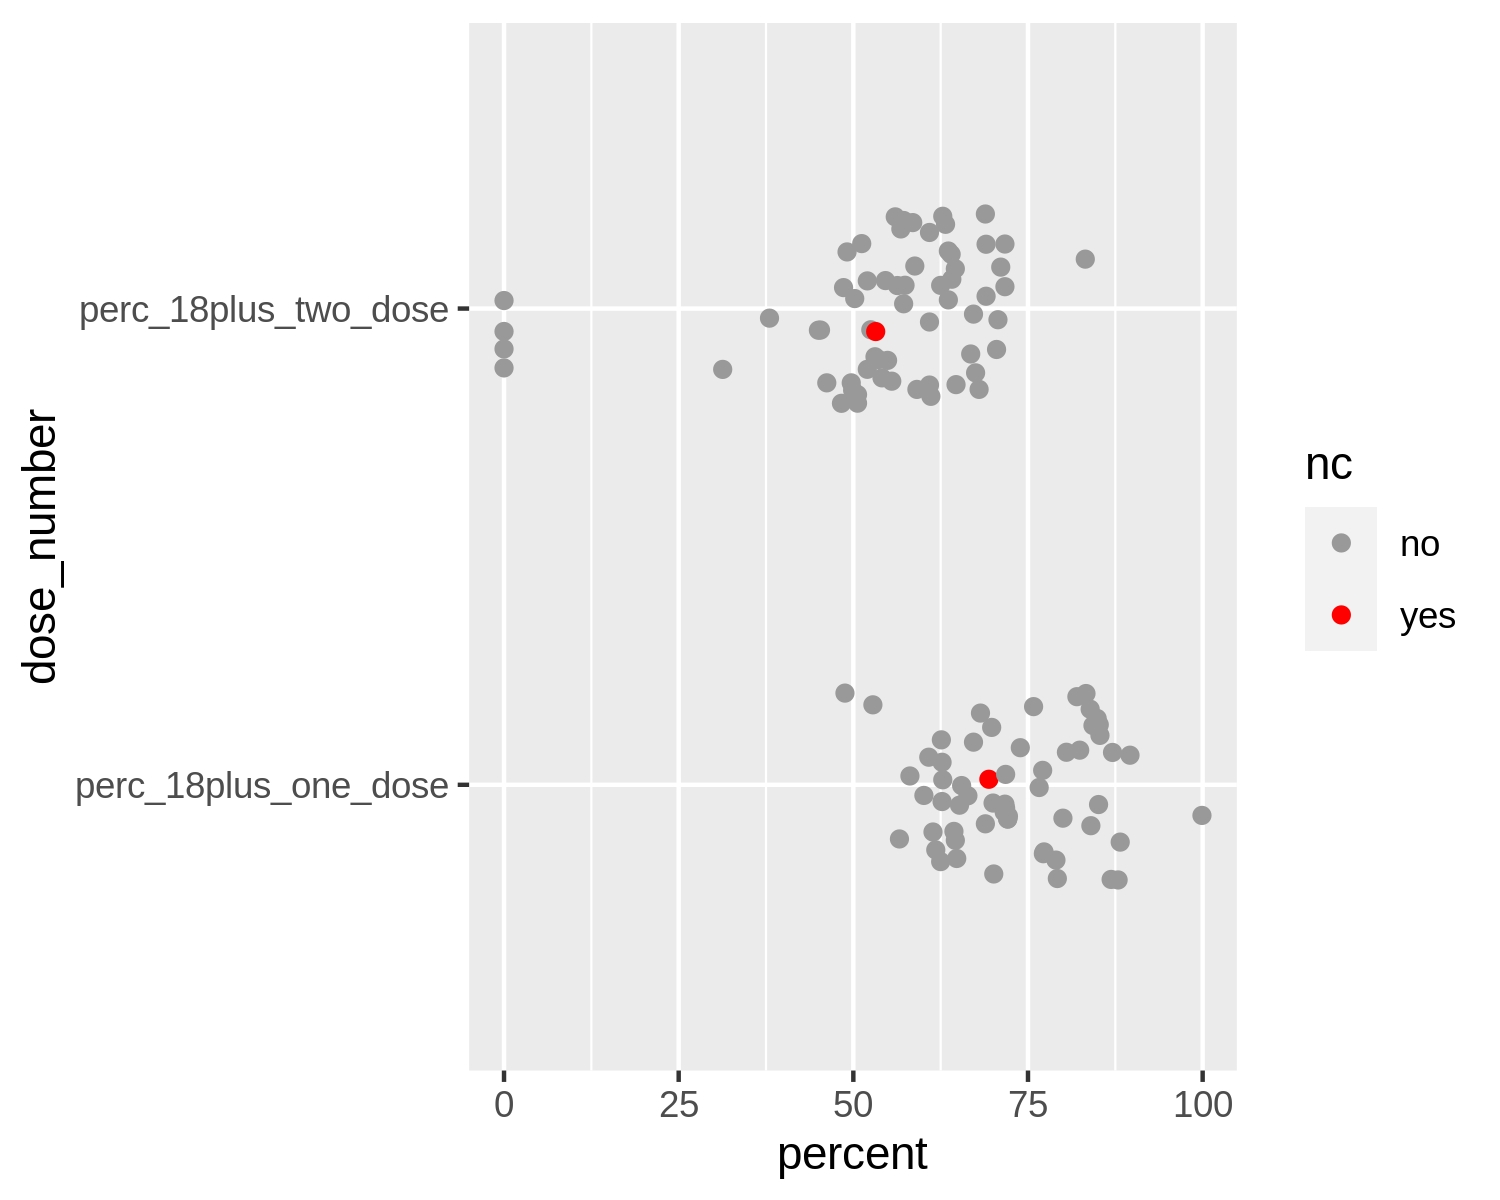

In [12]:
p = ggplot(vax_data_long, aes(x = percent, y = dose_number, color = nc))
p = p + geom_point(position = position_jitter(w = 0, h = 0.2))
# w = 0 does not allow the points to move in the horizontal position, just up and down
    #this allows us to accurately view the values the points are
p = p + scale_color_manual(values = c("gray60", "red"))

p





In [13]:
library(ggrepel)

Warning message:
“Removed 4 rows containing missing values (geom_point).”


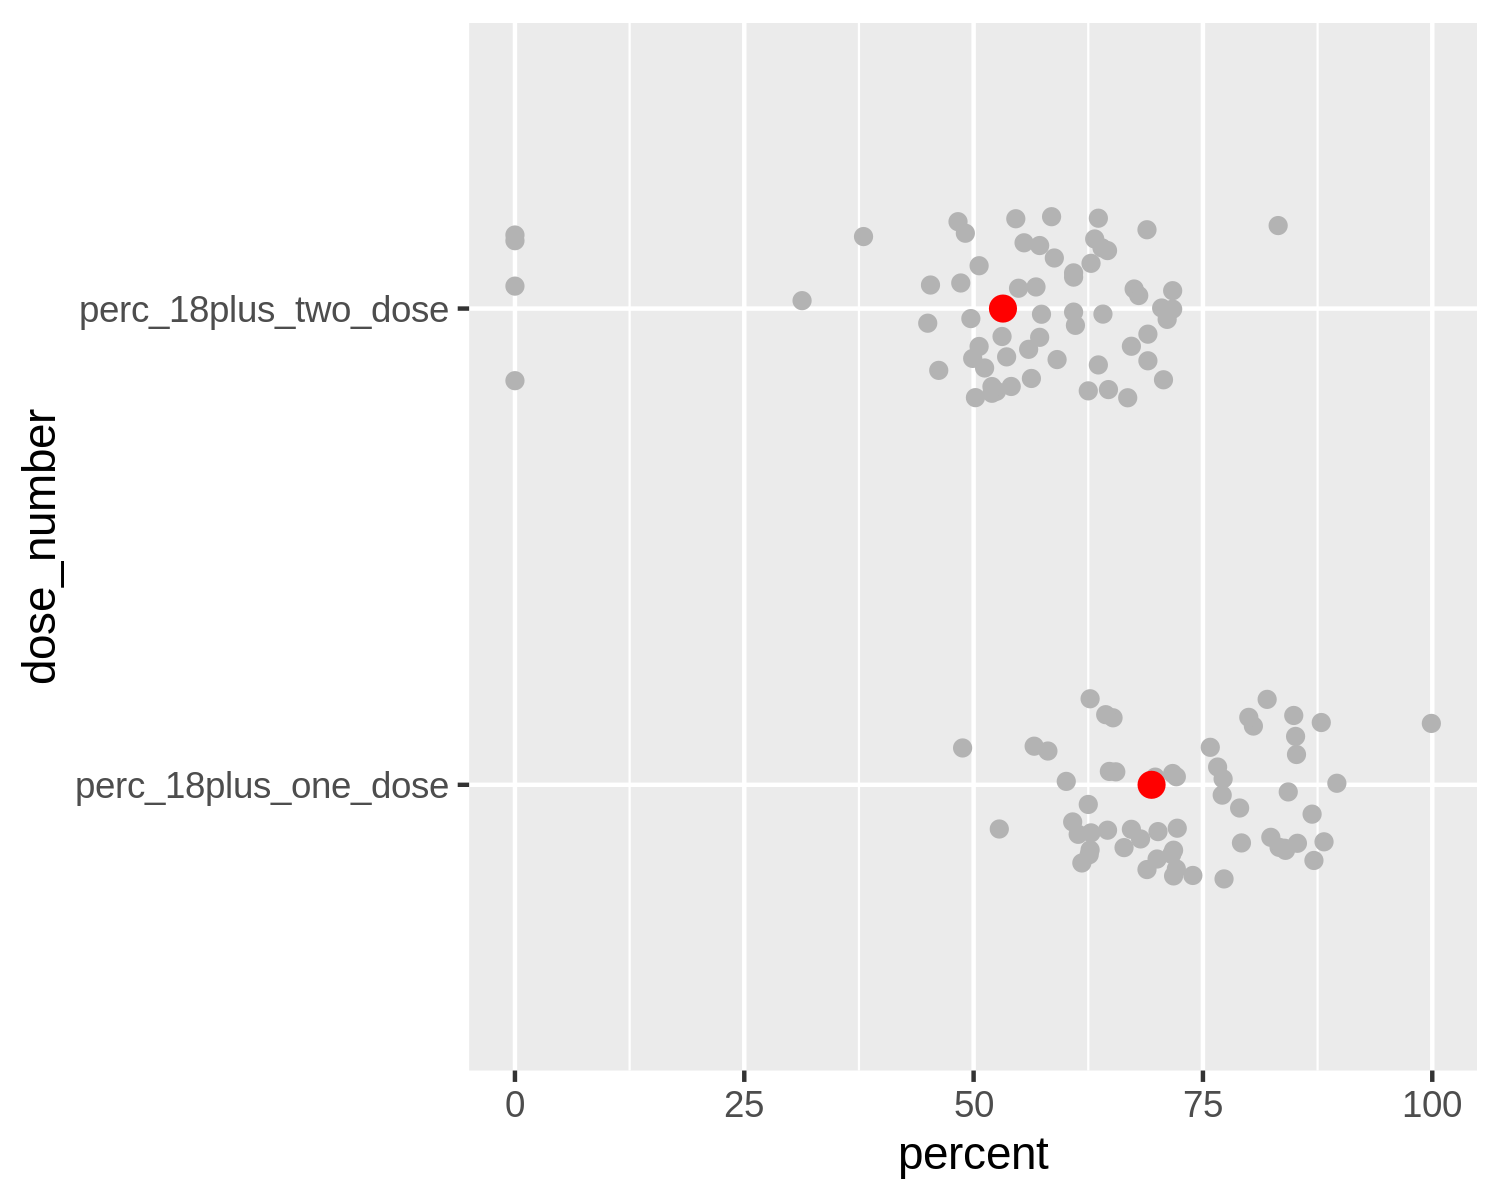

In [14]:
p = ggplot(vax_data_long, aes(x = percent, y = dose_number))
p = p + geom_point(position = position_jitter(w = 0, h = 0.2), color = 'grey70',
                      data = vax_data_long %>% filter(nc == 'no'))
# w = 0 does not allow the points to move in the horizontal position, just up and down
    #this allows us to accurately view the values the points are

p = p + geom_point(data = vax_data_long %>% filter(nc == 'yes'), color = 'red', size =2.5)


p

##Doing the graph this way brings the nc points to the front and emphasizes it by changing size



Warning message:
“Removed 4 rows containing missing values (geom_point).”


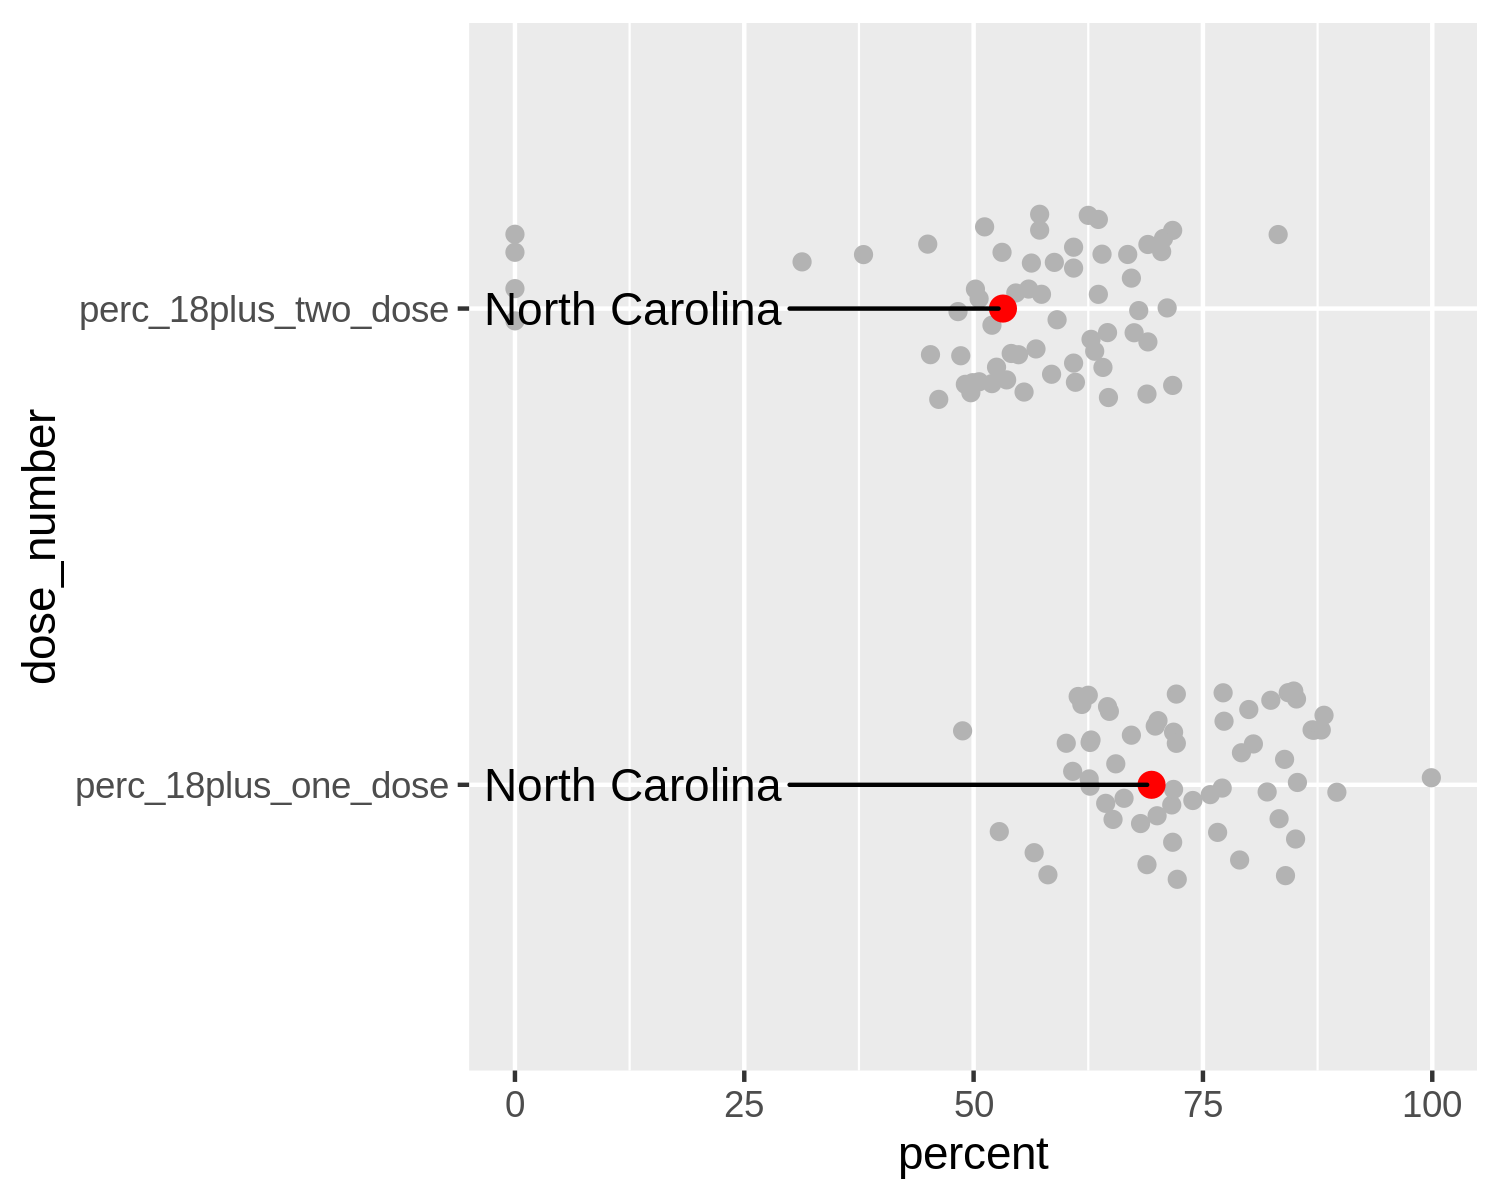

In [24]:
p = ggplot(vax_data_long, aes(x = percent, y = dose_number, label = `State/Territory/Federal Entity`))
p = p + geom_point(position = position_jitter(w = 0, h = 0.2), color = 'grey70',
                      data = vax_data_long %>% filter(nc == 'no'))
# w = 0 does not allow the points to move in the horizontal position, just up and down
    #this allows us to accurately view the values the points are

p = p + geom_point(data = vax_data_long %>% filter(nc == 'yes'), color = 'red', size =2.5)

p = p + geom_text_repel(data = vax_data_long%>% filter(nc == 'yes'),
                       nudge_x = -100)

p

##Doing the graph this way brings the nc points to the front and emphasizes it by changing size



🛑 **Stop here** 🛑

Use `percent_format` function from the `scales` and `scale_x_continuous` package to update the `x-axis` labels to percent formatting.

In [16]:
p = ggplot()

Make the same chart with a different theme (E.g. try `theme_minimal`).